<a href="https://colab.research.google.com/github/AthithyaJB/AthithyaJB/blob/main/Facial_Emotional_Recogonistion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import zipfile

In [ ]:
!unzip ('/content/drive/MyDrive/ergasia_MLD_qmul.zip')

/bin/bash: -c: line 0: syntax error near unexpected token `'/content/drive/MyDrive/ergasia_MLD_qmul.zip''
/bin/bash: -c: line 0: `unzip ('/content/drive/MyDrive/ergasia_MLD_qmul.zip')'


In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/ergasia_MLD_qmul.zip", 'r')
zip_ref.extractall("/*")
zip_ref.close()

In [ ]:
!unzip -u "/content/drive/MyDrive/ergasia_MLD_qmul.zip" -d "/content/drive/My Drive/Feelings"

In [23]:
img_array = cv2.imread("/content/drive/MyDrive/ergasia MLD qmul/ANGER/000046.jpg")

In [24]:
img_array.shape #rgb

(128, 128, 3)

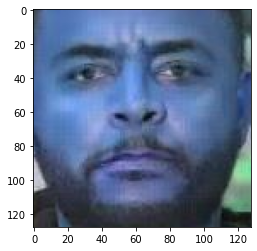

In [25]:
plt.imshow(img_array)

In [26]:
Datadirectory = "/content/drive/MyDrive/ergasia MLD qmul/" ##TRAINING DATASET

In [27]:
Classes = ["ANGER","DISGUST","FEAR","HAPPINESS","SADNESS","SURPRISE"] 

In [88]:
Class_Anger = "/content/drive/MyDrive/ergasia MLD qmul/ANGER"

In [90]:
Class_Anger=[]
for img in os.listdir(hjk):
  Class_Anger.append(img)


In [91]:
len(Class_Anger)

8228

In [92]:
Class_disgust = "/content/drive/MyDrive/ergasia MLD qmul/DISGUST"
list_disgust=[]
for img in os.listdir(Class_disgust):
  list_disgust.append(img)
len(list_disgust)  

2651

In [94]:
Class_fear = "/content/drive/MyDrive/ergasia MLD qmul/FEAR"
list_fear=[]
for img in os.listdir(Class_fear):
  list_fear.append(img)
len(list_fear) 

2985

In [95]:
Class_hap = "/content/drive/MyDrive/ergasia MLD qmul/HAPPINESS"
list_hap=[]
for img in os.listdir(Class_hap):
  list_hap.append(img)
len(list_hap) 

9183

In [96]:
Class_sad = "/content/drive/MyDrive/ergasia MLD qmul/SADNESS"
list_sad =[]
for img in os.listdir(Class_sad):
  list_sad.append(img)
len(list_sad) 

13050

In [97]:
Class_sur = "/content/drive/MyDrive/ergasia MLD qmul/SURPRISE"
list_sur =[]
for img in os.listdir(Class_sur):
  list_sur.append(img)
len(list_sur) 

7418

In [98]:
import pandas as pd
data = [['ANGER',8228],['DISGUST',2651],['FEAR',2985],['HAPPINESS',9183],['SAD',13050],['SURPRISE',7418]]
df = pd.DataFrame(data, columns=['EMOTIONS', 'IMAGES'])
df

,EMOTIONS,IMAGES
0,ANGER,8228
1,DISGUST,2651
2,FEAR,2985
3,HAPPINESS,9183
4,SAD,13050
5,SURPRISE,7418


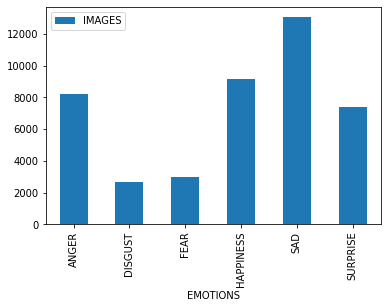

In [99]:
df.plot(x="EMOTIONS", y=["IMAGES"], kind="bar")

In [101]:
data_d = [['ANGER',8228,8228],['DISGUST',2651,2458],['FEAR',2985,2983],['HAPPINESS',9183,9113],['SAD',13050,13040],['SURPRISE',7418,7417]]
df_d = pd.DataFrame(data_d, columns=['EMOTIONS', 'IMAGES with dulpicates','NO Duplicate Images'])
df_d

,EMOTIONS,IMAGES with dulpicates,NO Duplicate Images
0,ANGER,8228,8228
1,DISGUST,2651,2458
2,FEAR,2985,2983
3,HAPPINESS,9183,9113
4,SAD,13050,13040
5,SURPRISE,7418,7417


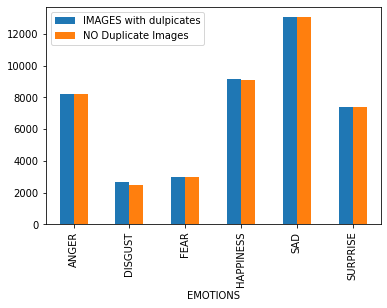

In [104]:
df_d.plot(x="EMOTIONS", y=["IMAGES with dulpicates","NO Duplicate Images"], kind="bar")

Angger 0 Fear 2 Happiness 70 Disgust 193 Sadness 10 SUrprise 1

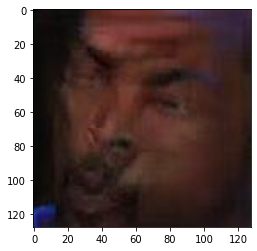

In [28]:
for category in Classes:
  path = os.path.join(Datadirectory,category)
  for img in os.listdir(path):
    img_array =cv2.imread(os.path.join(path,img))
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break  

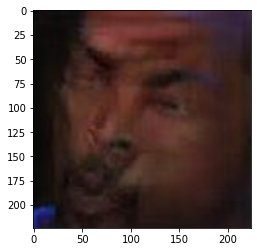

In [29]:
img_size = 224 ## ImageNet => 224 *224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [30]:
new_array.shape

(224, 224, 3)

# read all the img and convert them to array

In [31]:
training_Data = [] ## data

def create_training_Data():
  for category in Classes:
    path = os.path. join(Datadirectory, category)
    class_num = Classes.index(category) ## 0 1,## Label
    for img in os.listdir (path) :
      try:
        img_array = cv2.imread(os.path.join(path,img))
        new_array= cv2.resize(img_array, (img_size,img_size))
        training_Data.append([new_array,class_num])
      except Exception as e:
        pass

In [32]:
create_training_Data()

In [33]:
print(len(training_Data))

43515


In [34]:
temp = np.array(training_Data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [35]:
temp.shape

(43515, 2)

In [36]:
import random 

random.shuffle(training_Data)

In [48]:
td = training_Data[0:10000]

In [21]:
ytd = np.array(td).reshape(-1,img_size, img_size,3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


ValueError: ignored

In [50]:
X = []
y = []

for features,label in td:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size , img_size ,1)

In [51]:
X.shape

(30000, 224, 224, 1)

ValueError: ignored

In [37]:
import hashlib


In [38]:
os.getcwd()

'/content'

In [71]:
os.chdir("/content/drive/MyDrive/ergasia MLD qmul/SURPRISE")
os.getcwd()

'/content/drive/MyDrive/ergasia MLD qmul/SURPRISE'

In [72]:
fl = os.listdir()
print(fl)

['006567.jpg', '001832.jpg', '011438.jpg', '011439.jpg', '006568.jpg', '001833.jpg', '006569.jpg', '011440.jpg', '001834.jpg', '006570.jpg', '011441.jpg', '001835.jpg', '001836.jpg', '011442.jpg', '006571.jpg', '001837.jpg', '011443.jpg', '006572.jpg', '001838.jpg', '006573.jpg', '011444.jpg', '006574.jpg', '011445.jpg', '001839.jpg', '001840.jpg', '006575.jpg', '011446.jpg', '001841.jpg', '006576.jpg', '011447.jpg', '011448.jpg', '006577.jpg', '001842.jpg', '001843.jpg', '011449.jpg', '006578.jpg', '006579.jpg', '001844.jpg', '011450.jpg', '011451.jpg', '006580.jpg', '001845.jpg', '011452.jpg', '006581.jpg', '001846.jpg', '011453.jpg', '001847.jpg', '006582.jpg', '006583.jpg', '011454.jpg', '001848.jpg', '006584.jpg', '001849.jpg', '011455.jpg', '006585.jpg', '001850.jpg', '011456.jpg', '001851.jpg', '006586.jpg', '011457.jpg', '006587.jpg', '001852.jpg', '011458.jpg', '011459.jpg', '006588.jpg', '001853.jpg', '011460.jpg', '006589.jpg', '001854.jpg', '011461.jpg', '001855.jpg', '0065

In [73]:
import hashlib, os
duplicates = []
hash_keys = dict ()
for index,filename in enumerate (os. listdir('.')):
  if os.path.isfile (filename):
    with open (filename,'rb') as f:
      filehash = hashlib.md5 (f.read () ).hexdigest ()
      if filehash not in hash_keys:
        hash_keys[filehash] = index
      else:
        duplicates. append ((index, hash_keys[filehash]))

In [74]:
duplicates

[(6322, 878)]

In [75]:
len(duplicates)

1

Angger 0
Fear 2
Happiness 70
Disgust 193
Sadness 10
SUrprise 1